In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.image as mpimg   # This module will help us convert .jpeg and .png files to numpy arrays

In [4]:
image_as_array = mpimg.imread('C:\\Users\\MansiJadhav\\Python-for-Machine-Learning-&-Data-Science-Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\palm_trees.jpg')

In [5]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [6]:
image_as_array.shape   # (H,W,C)

(1401, 934, 3)

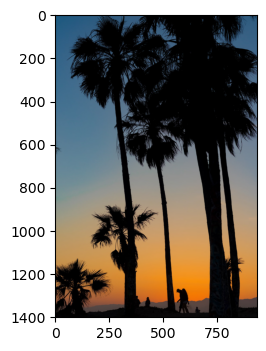

In [8]:
plt.figure(dpi=100)
plt.imshow(image_as_array)    # imshow takes in an array

In [9]:
# (H,W,C) --> (H*W, C) (2D)

In [10]:
(h,w,c) = image_as_array.shape

In [12]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [13]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [14]:
len(image_as_array.shape)

3

In [15]:
len(image_as_array2d.shape)

2

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=6)

In [18]:
labels = model.fit_predict(image_as_array2d)

In [19]:
1401*934   # Number of data points

1308534

In [20]:
labels

array([4, 4, 4, ..., 1, 1, 1])

In [28]:
model.cluster_centers_       # 6 RGB values for each cluster

array([[219.37971988, 133.87892134,  44.24178951],
       [  2.76064283,   2.57904209,   3.70381361],
       [140.04563452, 144.77690418, 142.94084452],
       [195.04366623, 154.53618406, 105.6043535 ],
       [ 72.02389556, 109.94845585, 138.0524364 ],
       [ 67.26821986,  61.65536479,  62.20015977]])

In [29]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [30]:
rgb_codes

array([[219, 134,  44],
       [  3,   3,   4],
       [140, 145, 143],
       [195, 155, 106],
       [ 72, 110, 138],
       [ 67,  62,  62]])

In [31]:
rgb_codes[labels]    # 0 will match to 0 index, etc

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [32]:
# To display these cluster centers, we need to reshape them back to 3D

In [35]:
quantized_image = rgb_codes[labels].reshape((h,w,c))

In [38]:
quantized_image    # Similar to first array

array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

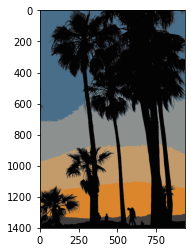

In [39]:
plt.imshow(quantized_image)